In [30]:
import numpy as np
import matplotlib.colors as colors
from cartopy import config
import cartopy.crs as ccrs
from matplotlib import colors
from matplotlib.cm import get_cmap
import colorcet as cc
import matplotlib.pyplot as plt
import cartopy.mpl.ticker as cticker
import xarray as xr
import copy

load data

In [3]:
#load vertical cross-sections
ds=xr.open_dataset('/net/ch4/atmcirc/zilnora/era5_midwinter/data/netcdf_filtering/monthdir/EKE_mean_cross_allmonths')

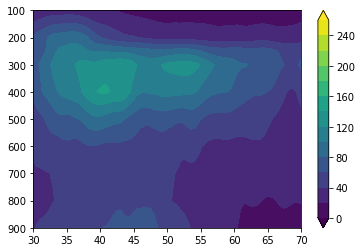

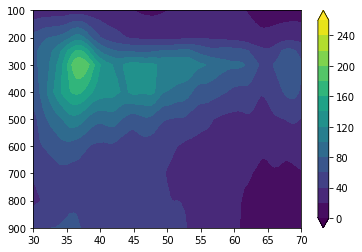

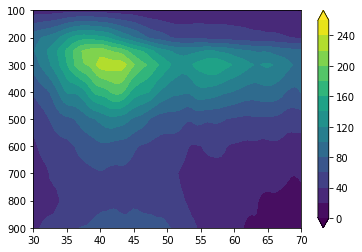

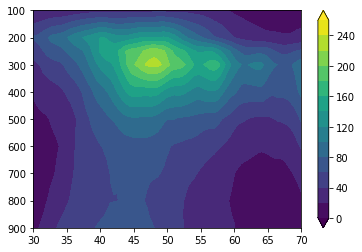

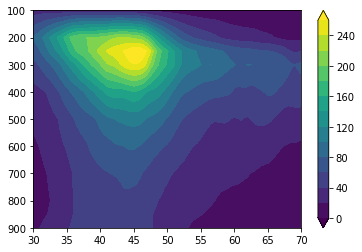

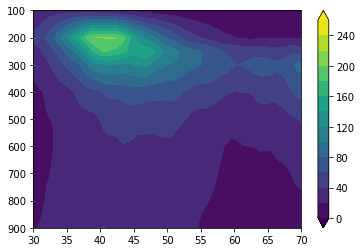

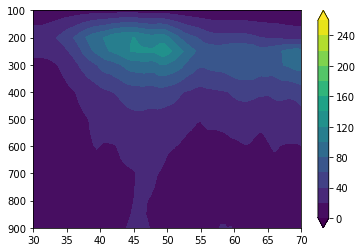

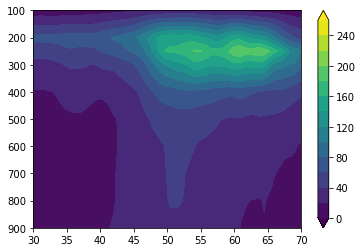

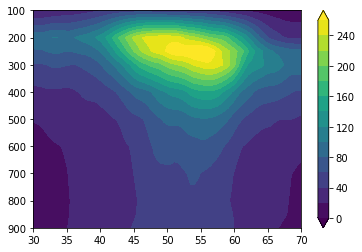

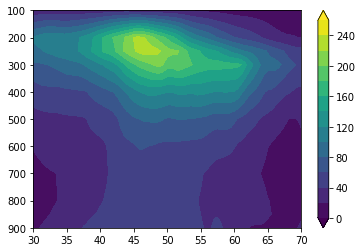

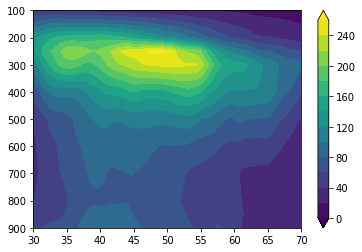

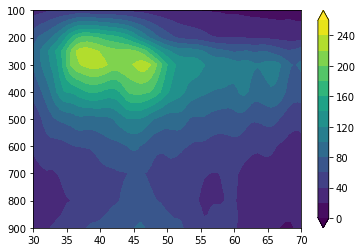

In [28]:
plt.figure()
for i in range(12):
    plt.contourf(ds.lat,ds.plev/100,ds.EKE[i,:,:,0],levels=np.arange(0,270,20),extend='both')
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

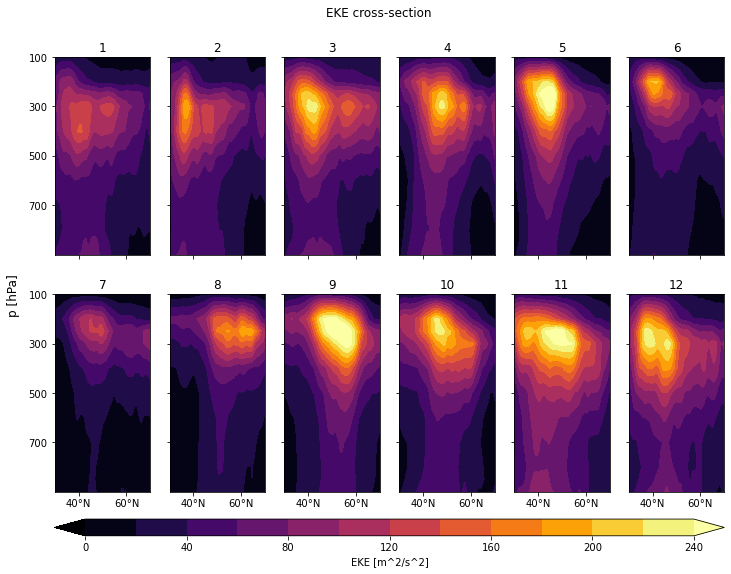

In [119]:
field=ds.EKE[i,:,:,0]
lats=ds.lat
plev=ds.plev/100

cmap = copy.copy(plt.cm.get_cmap('cet_linear_kbgyw_5_98_c62_r'))
min_filt = 0
max_filt = 240
med_filt = 120
divnorm=colors.TwoSlopeNorm(vmin=min_filt, vcenter=med_filt, vmax=max_filt)

fig, axs = plt.subplots(2,6,figsize=(12,10),sharex=True, sharey=True)


for i in range(12):
    CS=axs[int(i/6),i%6].contourf(lats,plev,ds.EKE[i,:,:,0],levels=np.arange(0,260,20),cmap='inferno',extend='both')
    axs[int(i/6),i%6].set_title(i+1)
    lat_formatter = cticker.LatitudeFormatter()
    axs[int(i/6),i%6].xaxis.set_major_formatter(lat_formatter)
    axs[int(i/6),i%6].set_yticks(np.arange(100,900,200))


axs[int(i/6),i%6].invert_yaxis()
    
cbar=fig.colorbar(ax=axs,aspect=40,pad=0.05,location='bottom',mappable=CS)
cbar.set_label('EKE [m^2/s^2]')
fig.suptitle('EKE cross-section',y=0.95)
fig.supylabel('p [hPa]',x=0.07,y=0.55)

plt.savefig('/net/ch4/atmcirc/zilnora/era5_midwinter/plots/EKE_seasonal_vertical.pdf', facecolor='white',bbox_inches='tight')
